## Preprocessing and Pipeline

In [37]:
import pandas as pd
from urllib.request import urlretrieve
link = "https://assets.datacamp.com/production/repositories/5981/datasets/fea5cd4c72c2346dafffb0a5ae425006968f4e00/music_ch4_l1.csv"
music_df = pd.read_csv(urlretrieve(link, 'music_ch4_l1.csv')[0])
print("Shape of music_df: {}".format(music_df.shape))

Shape of music_df: (1000, 12)


In [38]:
music_df.head(2)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687,0.117,-5.611,0.177,102.619,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000,0.120,-7.626,0.225,173.915,0.636,Rap


In [39]:
music_df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
genre                object
dtype: object

In [40]:
music_df.describe(include= 'all')


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.406497,0.480057,NaN
std,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.941857,0.237854,NaN
min,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,NaN
25%,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,NaN
50%,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,120.406497,0.473500,NaN
75%,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,NaN


In [53]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first= True)
music_dummies.head(3)

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False


In [54]:
music_dummies.dtypes

Anime         bool
Blues         bool
Classical     bool
Country       bool
Electronic    bool
Hip-Hop       bool
Jazz          bool
Rap           bool
Rock          bool
dtype: object

In [55]:
# Convert True/False to 1/0 using .replace()
music_dummies = music_dummies.replace({True: 1, False: 0})


In [56]:
music_dummies.head(3)

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0


In [57]:
music_df = pd.concat([music_df , music_dummies], axis = 1)

In [64]:
music_df = music_df.drop('genre', axis=1)


In [65]:
music_df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [67]:
print(music_df.dtypes)


popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object


In [68]:
# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


In [69]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

link = "https://assets.datacamp.com/production/repositories/5981/datasets/fea5cd4c72c2346dafffb0a5ae425006968f4e00/music_ch4_l1.csv"
music_df = pd.read_csv(urlretrieve(link, 'music_ch4_l1.csv')[0])
music_dummies = pd.get_dummies(music_df, drop_first=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
# Create X and y
X = music_df.drop(['popularity', 'genre'] , axis = 1)
y = music_df['popularity']


In [76]:
X.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [77]:

# Instantiate a ridge model
ridge =Ridge()

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(abs(scores))
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.631411114496892
Standard Deviation of the target array: 14.02156909907019


### Dropping Missing Values < 5%

In [93]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.neighbors import KNeighborsClassifier

link = "https://assets.datacamp.com/production/repositories/5981/datasets/b0d796dedecb99ccbab705512fc89b1b627db8bf/music_messy.csv"
music_df = pd.read_csv(urlretrieve(link, 'music_messy.csv')[0])

In [80]:
music_df.shape

(1000, 12)

In [79]:
music_df.isna().sum().sort_values()

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64

In [82]:
music_df = music_df.dropna(subset= ['tempo', 'genre', 'popularity', 'liveness', 'loudness'])

In [83]:
music_df.isna().sum().sort_values()

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64

In [84]:
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)


C:\Users\Koko Ellally\AppData\Local\Temp\ipykernel_17240\3682307541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)


In [91]:
np.sum(music_df['genre'] == 1)

446

In [92]:
print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64
Shape of the `music_df`: (892, 12)


###  Pipeline for song genre prediction

###  Pipeline for song genre prediction: II


In [95]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
link = "https://assets.datacamp.com/production/repositories/5981/datasets/1de4ac3f51c0f9f8ba37b39c672ba021a2e99a15/music_v2.csv"
music_df = pd.read_csv(urlretrieve(link, 'music_v2.csv')[0])
music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"], inplace=True)
# music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
imp_mean = SimpleImputer(strategy="mean")
knn = KNeighborsClassifier(n_neighbors=3)
y = music_df["genre"].values
X = music_df.drop("genre", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [99]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier()

# Build steps for the pipeline
steps = [("imputation", imputer), 
         ("k_nearest_neighbors", knn)]

pipeline = Pipeline(steps)


In [100]:
pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_hat))

[[77 11]
 [ 4 82]]


### Standard Scaler


In [102]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music_df = pd.read_csv(urlretrieve(link, 'music_clean_v2.csv')[0])
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [103]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.6193523316282489


#### Exercise 7: GridSearchCV, StandardScaler, Pipeline

In [108]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music = pd.read_csv(urlretrieve(link, "music_clean_v2.csv")[0])
X = music.drop("genre", axis=1).values
y = music["genre"].values

In [115]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.arange(0.001, 1, 200)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.7849999999999999 
 {'logreg__C': 0.001}


#### Visualizing regression model performance


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music = pd.read_csv(urlretrieve(link, "music_clean_v2.csv")[0])
dummy_df = pd.get_dummies(music, prefix="", prefix_sep="")
X = dummy_df.drop("energy", axis=1).values
y = dummy_df["energy"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

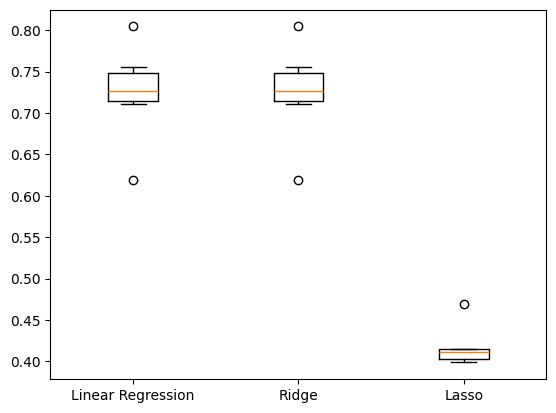

In [120]:

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model ,X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [122]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music = pd.read_csv(urlretrieve(link, "music_clean_v2.csv")[0])
dummy_df = pd.get_dummies(music, prefix="", prefix_sep="")
X = dummy_df.drop("energy", axis=1).values
y = dummy_df["energy"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=1.0)}

In [124]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.1198885150594757
Ridge Test Set RMSE: 0.11987066103299669


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music = pd.read_csv(urlretrieve(link, "music_clean_v2.csv")[0])
music["popularity_label"] = np.where(music["popularity"] >= 54.000000, 1, 0)
music.drop("popularity", axis=1, inplace=True)
X = music.drop("popularity_label", axis=1).values
y = music["popularity_label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Instructions 

- Create a dictionary of `"Logistic Regression"`, `"KNN"`, and `"Decision Tree Classifier"`, setting the dictionary's values to a call of each model.
- Loop through the values in `models`.
- Instantiate a `KFold` object to perform 6 splits, setting `shuffle` to `True` and `random_state` to `12`.
- Perform cross-validation using the model, the scaled training features, the target training set, and setting `cv` equal to `kf`.


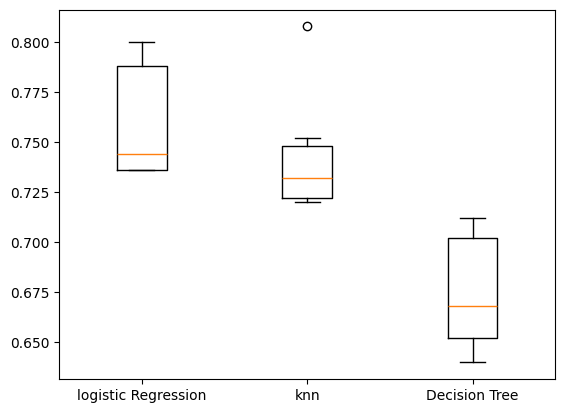

In [130]:
models = {"logistic Regression": LogisticRegression(), "knn": KNeighborsClassifier(n_neighbors= 9), "Decision Tree": DecisionTreeClassifier()}
results = []
for model_name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state= 12)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    results.append(cv_scores)

plt.boxplot(results, labels=models.keys())
plt.show()

###  Pipeline for predicting song popularity


In [141]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
link = "https://assets.datacamp.com/production/repositories/5981/datasets/2faa6dc465fa0facb9102aee40344e216d9cb8db/music_clean_v2.csv"
music = pd.read_csv(urlretrieve(link, 'music_clean_v2.csv')[0])
music.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"], inplace=True)
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)
kf = KFold(n_splits=5, shuffle=True, random_state=5)

###  Instructions 

- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
- Create a pipeline object, and pass the `steps` variable.
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
- Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [144]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

steps = [('imputer', SimpleImputer()),
         ('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

In [145]:
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.82
